# Домашнее задание 
Анализ данных
# Ultra light

Для выполнения этого задания используйте базу hh_parsed_new.csv.

1. Постройте графики зависимости ЗП от Возраст и ЗП от Опыт. Посмотрите, какие есть выбросы и проанализируйте, что можно исправить в этих данных.

2. Постройте диаграмму значений столбца Образование и ВУЗ.

3. Постройте диаграмму значений столбца Город.

4. Постройте диаграмму значений столбца Занятость первых 10-ти самых востребованных (популярных) значений.

5. Напишите выводы по тем диаграммам, которые были построены.


In [ ]:
%matplotlib inline

import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
from tensorflow.keras import utils # Будем использовать эту библиотеку для 
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой

import re # Регулряные выражения для эффективной работы со строками

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

In [ ]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 7

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hh = pd.read_csv('/content/drive/MyDrive/hh_parsed_new.csv')
hh

In [ ]:
hh.rename(columns={'Опыт (двойное нажатие для полной версии)': 'Опыт'}, 
             inplace=True) # Переименовываем столбец в "Опыт"
hh.head(10)

,Пол,Возраст,ЗП,Город,Занятость,График,Опыт,Образование и ВУЗ,Ищет работу на должность
0,М,44,27000.0,малый или за пределами России город,полная занятость,полный день,73,среднее специальное,Старший администратор
1,М,42,60000.0,малый или за пределами России город,"частичная занятость, полная занятость","гибкий график, полный день",230,высшее,Старший IT инженер
2,М,45,65000.0,малый или за пределами России город,полная занятость,"полный день, удаленная работа",237,высшее,"Системный администратор, Системный инженер"
3,М,44,70000.0,Москва,полная занятость,"гибкий график, полный день, удаленная работа",69,высшее,"Web-программист, Web-администратор, Web-мастер"
4,М,41,45000.0,малый или за пределами России город,"частичная занятость, полная занятость","полный день, сменный график",161,высшее,Старший системный администратор \ начальник от...
5,М,36,50000.0,Казань,полная занятость,полный день,155,высшее,менеджер по продажам
6,Ж,32,17000.0,малый или за пределами России город,полная занятость,полный день,94,среднее специальное,Оператор
7,М,41,80000.0,Москва,полная занятость,полный день,200,высшее,Руководитель проектов
8,Ж,42,120000.0,Москва,полная занятость,полный день,173,высшее,Менеджер по работе с корпоративными клиентами
9,М,46,120000.0,малый или за пределами России город,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",256,высшее,"IT-инженер,инженер AV-систем"


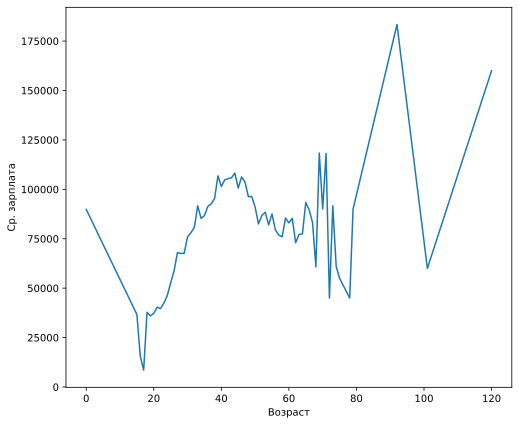

In [ ]:
# Средняя ЗП от возраста
hh.groupby('Возраст')['ЗП'].mean().plot()
plt.xlabel('Возраст')
plt.ylabel('Ср. зарплата')
plt.show()

5. Вывод: Данные слева от 18 лет можно отнести к выбросам и перенести значения в район медианы. Справа от 80 могут быть как выбросами, так и позициями специалистов с уникальным опытом, именем и т.д. поэтому необходимо сделать выборку и проанализировать. Возможны опечатки и некорректные данные.

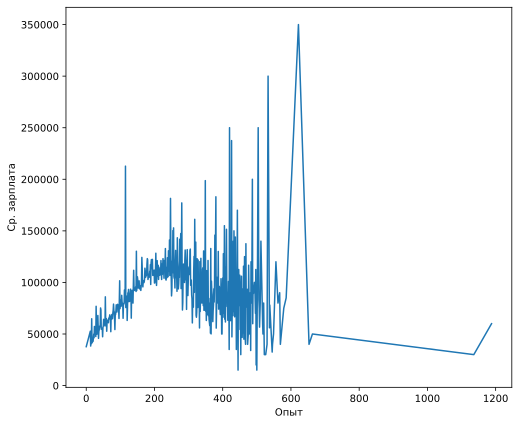

In [ ]:
# Средняя ЗП от возраста
hh.groupby('Опыт')['ЗП'].mean().plot()
plt.xlabel('Опыт')
plt.ylabel('Ср. зарплата')
plt.show()

5. Данные правее 650 вероятно некорректны - или выбросы или некорректная выборка. Необходимо сделать выборку данных и дополнительно их оценить на предмет корректности. Многие сильные специалисты не готовы указать конкретные цифры и ставят символическое значение или не заполняют данные. Это может снизить среднее значение и выдать некорректные цифры. В основном диапезоне есть единичные пикообразные выбросы, которые могут повлиять на среднее значение по оцениваемому диапазону.

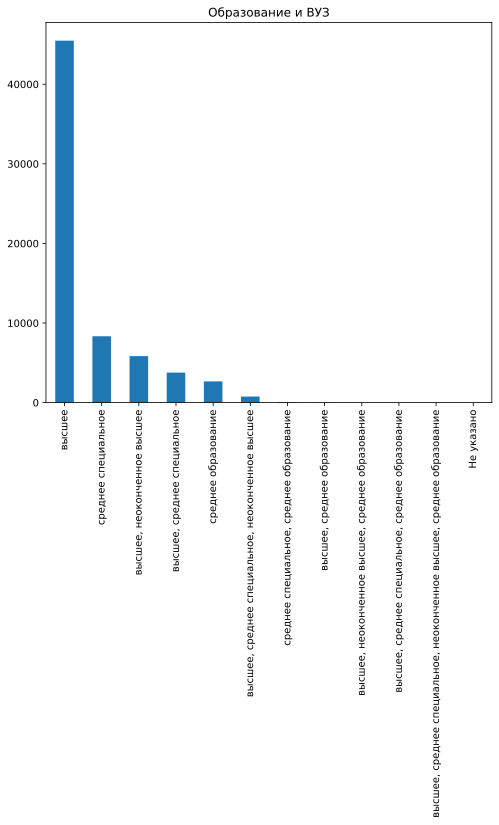

In [ ]:
hh['Образование и ВУЗ'].value_counts().iloc[:30].plot(kind='bar')
plt.title('Образование и ВУЗ')
plt.show()

5. Вывод шуточный - высшее образование приводит к безработице.:) Более серьезный - работники низкой квалификации меньше ищут работу, возможно такие работники в большем дефиците, чем высококвалифицированные специалисты. Наподобие пресловутого переизбытка юристов и экономистов.

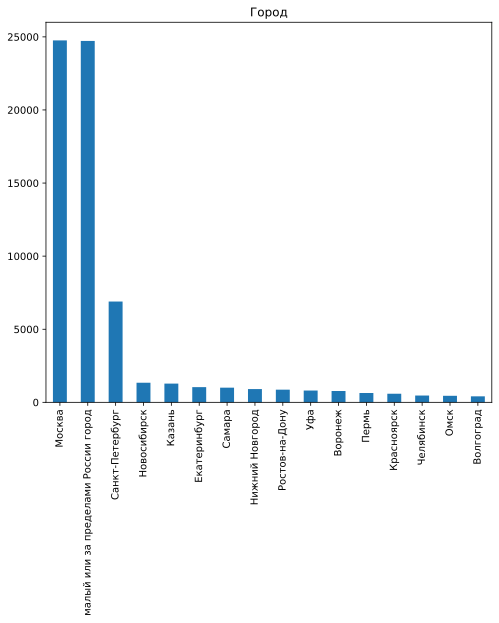

In [ ]:
hh['Город'].value_counts().iloc[:30].plot(kind='bar')
plt.title('Город')
plt.show()

5. Таблица дает возможность исключительно количественного анализа. Для качественного, с учетом процентного соотношения можно сделать дополнительную выборку численности населения и сопоставление в процентном соотношении. Все зависит от целей анализа статистический или функциональный.

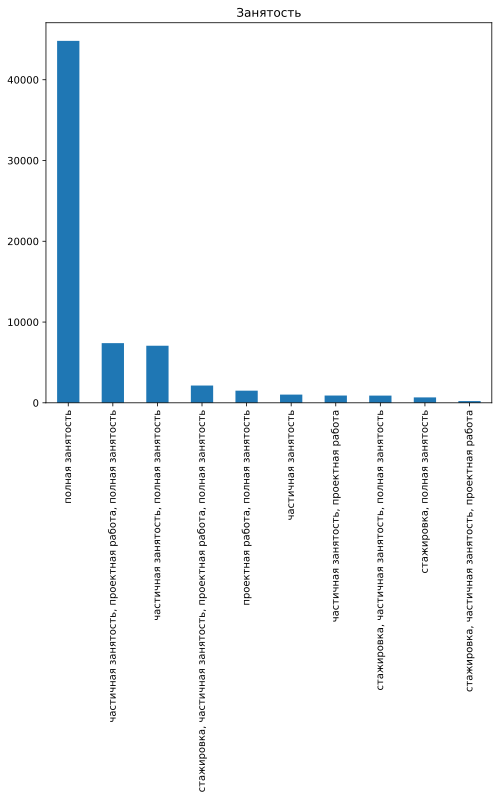

In [ ]:
hh['Занятость'].value_counts().iloc[:10].plot(kind='bar')
plt.title('Занятость')
plt.show()

5. Видна готовность, возможность или желание людей быть задействованными не на полную занятость. Вероятно корректные данные.